In [10]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('C:\\Users\\aksha\\data_analysis_job_market\\dataset\\data_jobs.csv')
print(df.head())

        job_title_short                                          job_title                  job_location             job_via job_schedule_type  job_work_from_home       search_location      job_posted_date  job_no_degree_mention  job_health_insurance    job_country salary_rate  salary_year_avg  salary_hour_avg                  company_name                                         job_skills                                    job_type_skills
0  Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...                 Watertown, CT     via Work Nearby         Full-time               False  Texas, United States  2023-06-16 13:44:15                  False                 False  United States         NaN              NaN              NaN          Boehringer Ingelheim                                                NaN                                                NaN
1          Data Analyst                                       Data Analyst  Guadalajara, Jalisco, Mexico    via 

In [12]:
df['job_posted_date']= pd.to_datetime(df.job_posted_date)
df['job_posted_month']= df.job_posted_date.dt.month
print(df.head())

        job_title_short                                          job_title                  job_location             job_via job_schedule_type  job_work_from_home       search_location     job_posted_date  job_no_degree_mention  job_health_insurance    job_country salary_rate  salary_year_avg  salary_hour_avg                  company_name                                         job_skills                                    job_type_skills  job_posted_month
0  Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...                 Watertown, CT     via Work Nearby         Full-time               False  Texas, United States 2023-06-16 13:44:15                  False                 False  United States         NaN              NaN              NaN          Boehringer Ingelheim                                                NaN                                                NaN                 6
1          Data Analyst                                       Data Analyst  Gu

In [31]:
us_jobs = df[df['job_country']=='United States']
print(us_jobs.head(20))

         job_title_short                                          job_title                        job_location                                            job_via         job_schedule_type  job_work_from_home            search_location     job_posted_date  job_no_degree_mention  job_health_insurance    job_country salary_rate  salary_year_avg  salary_hour_avg                              company_name                                         job_skills                                    job_type_skills  job_posted_month
0   Senior Data Engineer  Senior Clinical Data Engineer / Principal Clin...                       Watertown, CT                                    via Work Nearby                 Full-time               False       Texas, United States 2023-06-16 13:44:15                  False                 False  United States         NaN              NaN              NaN                      Boehringer Ingelheim                                                NaN                      

In [32]:
## only display jobs where yearly salary average is notNAN

us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]
print(us_jobs.head())

    job_title_short                                          job_title       job_location       job_via job_schedule_type  job_work_from_home            search_location     job_posted_date  job_no_degree_mention  job_health_insurance    job_country salary_rate  salary_year_avg  salary_hour_avg                     company_name                                         job_skills                                    job_type_skills  job_posted_month
92    Data Engineer            Remote - Data Engineer - Permanent - W2           Anywhere  via LinkedIn         Full-time                True    Illinois, United States 2023-02-21 13:29:59                  False                  True  United States        year         120000.0              NaN                     Apex Systems                                  ['sql', 'python']                 {'programming': ['sql', 'python']}                 2
100  Data Scientist            Data Scientist, Risk Data Mining - USDS  Mountain View, CA  via LinkedIn 

In [33]:
us_jobs.groupby('job_title_short')[['salary_year_avg']].min()


salary_year_avg
job_title_short                           
Business Analyst                   35000.0
Cloud Engineer                     42000.0
Data Analyst                       25000.0
Data Engineer                      23496.0
Data Scientist                     30000.0
Machine Learning Engineer          44408.5
Senior Data Analyst                35360.0
Senior Data Engineer               45000.0
Senior Data Scientist              55000.0
Software Engineer                  48982.0

In [40]:
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median','min','max','count']).sort_values(by='median',ascending=False)

median      min       max  count
job_title_short                                              
Senior Data Scientist      155000.0  55000.0  475000.0   1241
Machine Learning Engineer  150000.0  44408.5  315000.0    128
Senior Data Engineer       150000.0  45000.0  375000.0   1058
Data Scientist             130000.0  30000.0  960000.0   4553
Software Engineer          130000.0  48982.0  375000.0    157
Data Engineer              125000.0  23496.0  525000.0   2915
Cloud Engineer             116100.0  42000.0  221844.0     20
Senior Data Analyst        110000.0  35360.0  425000.0    913
Business Analyst            90000.0  35000.0  387460.0    431
Data Analyst                90000.0  25000.0  375000.0   4350

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: job_posted_month, dtype: int64


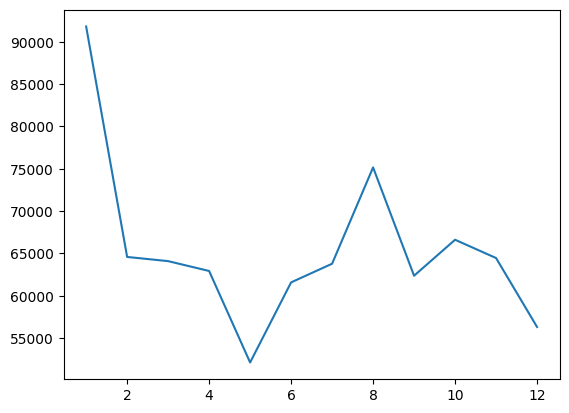

In [52]:
## plot a line chart with number of jobs posted in a each month

import matplotlib.pyplot as plt

## lets now get jobs posted every month
df['job_posted_month'] = df['job_posted_date'].dt.month
number_of_jobs = df.groupby('job_posted_month').job_posted_month.count()
print(number_of_jobs)

plt.plot(number_of_jobs.index, number_of_jobs)

<BarContainer object of 10 artists>

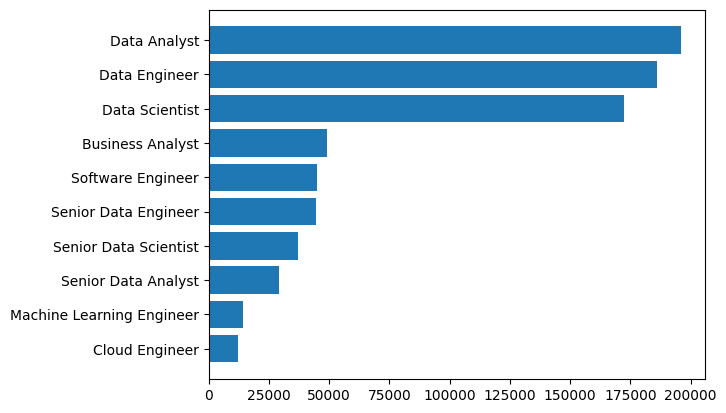

In [55]:
## let's plot the jobs posted per job title 

job_counts = df['job_title_short'].value_counts().sort_values(ascending=True)
plt.barh(job_counts.index , job_counts.values)